In [1]:
from imports import *

In [83]:
def main(base_folder,local_path,*args,**kwargs):
    bk.load.current_session_linux(base_folder,local_path)
    states = bk.load.states(True)
    for s in ['wake', 'drowsy']:
        states.pop(s)
    colors = ['green','grey','orange']
    df = pd.read_csv('Analysis/NetworkProperties/sync_cv_eib_fr_10s.csv')


    fig,ax = plt.subplots()
    rvalues = {}
    for state,c in zip(states,colors):
        
        if state == 'WAKE_HOMECAGE' : continue
        x = df.FR_Pyr[df.State==state].values
        y = df.Sync[df.State==state].values
        
        clean = ~(np.isnan(x) | np.isnan(y))
        x = x[clean]
        y = y[clean]

        reg = scipy.stats.linregress(x,y)
        x_ = np.linspace(0,np.max(x),100)
        y_ = (x_ * reg.slope) + reg.intercept

        pvalue = reg.pvalue
        rvalues[state] = reg.rvalue


        ax.scatter(x,y,s=10,c=c,alpha=0.50)
        ax.plot(x_,y_,color = c)
    plt.xlabel('FR_Pyr')
    plt.ylabel('Sync')
    plt.suptitle(bk.load.session)
    plt.tight_layout()


    df = pd.DataFrame(rvalues,index = [0])
    df['Rat'] = bk.load.rat
    return df

100%|██████████| 61/61 [00:03<00:00, 16.57it/s]

['Rat08-20130708', 'Rat08-20130718', 'Rat08-20130719', 'Rat08-20130720', 'Rat08-20130722', 'Rat09-20140404', 'Rat09-20140405', 'Rat09-20140407', 'Rat09-20140408', 'Rat09-20140409', 'Rat10-20140619', 'Rat10-20140620', 'Rat10-20140702', 'Rat10-20140705', 'Rat10-20140707', 'Rat10-20140708', 'Rat11-20150310', 'Rat11-20150312', 'Rat11-20150313', 'Rat11-20150314', 'Rat11-20150315', 'Rat11-20150316', 'Rat11-20150317', 'Rat11-20150401', 'Rat11-20150402', 'Rat11-20150403']
Batch finished in 3.6869940757751465
Some session were not processed correctly
['Rat08-20130708', 'Rat08-20130718', 'Rat08-20130719', 'Rat08-20130720', 'Rat08-20130722', 'Rat09-20140404', 'Rat09-20140405', 'Rat09-20140407', 'Rat09-20140408', 'Rat09-20140409', 'Rat10-20140619', 'Rat10-20140620', 'Rat10-20140702', 'Rat10-20140705', 'Rat10-20140707', 'Rat10-20140708', 'Rat11-20150310', 'Rat11-20150312', 'Rat11-20150313', 'Rat11-20150314', 'Rat11-20150315', 'Rat11-20150316', 'Rat11-20150317', 'Rat11-20150401', 'Rat11-20150402', '

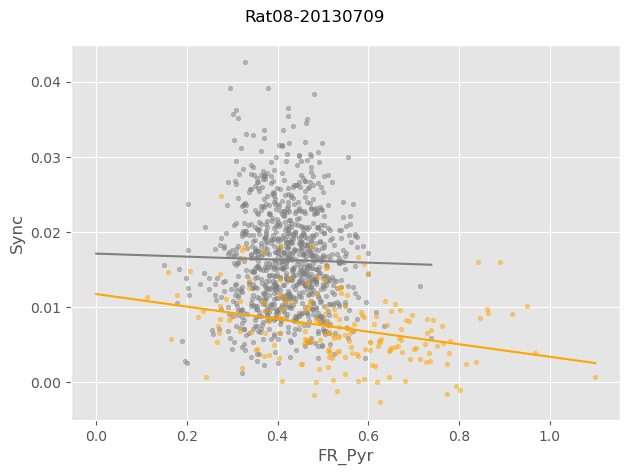

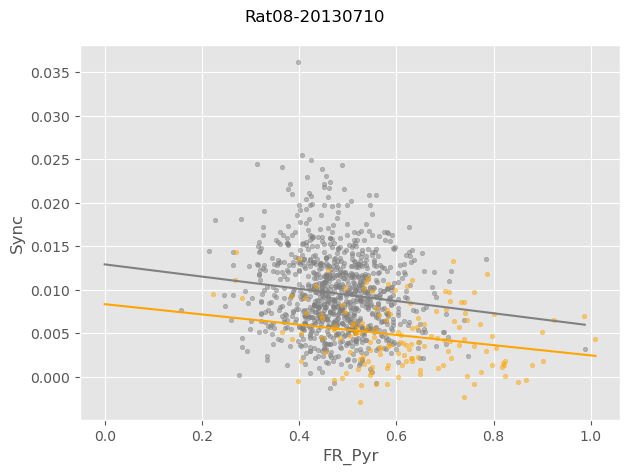

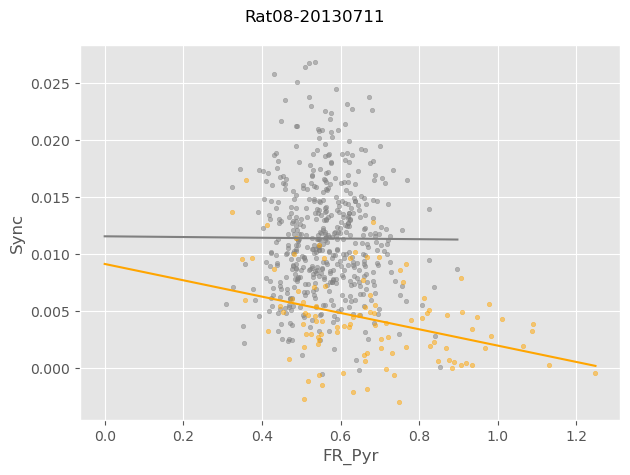

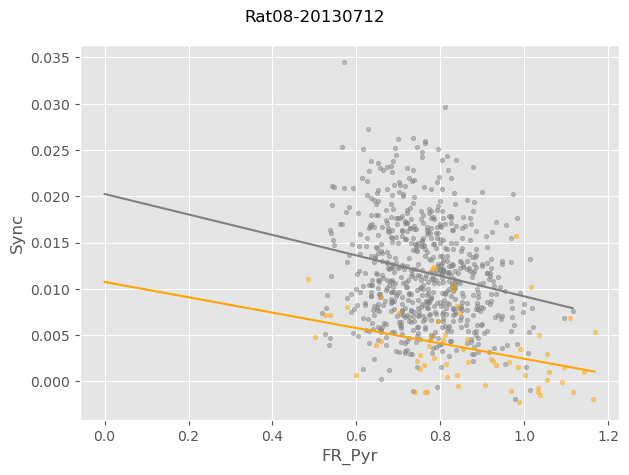

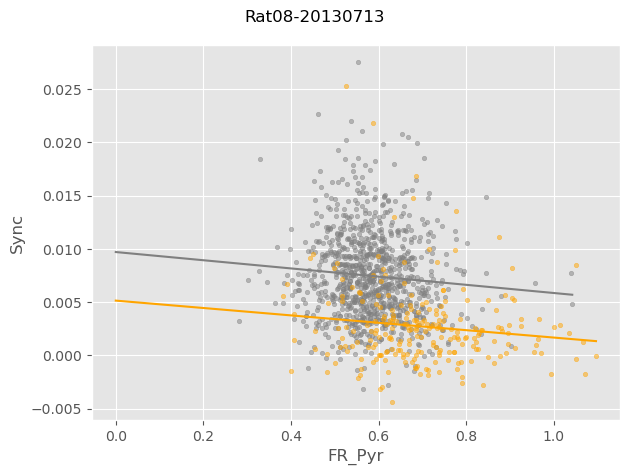

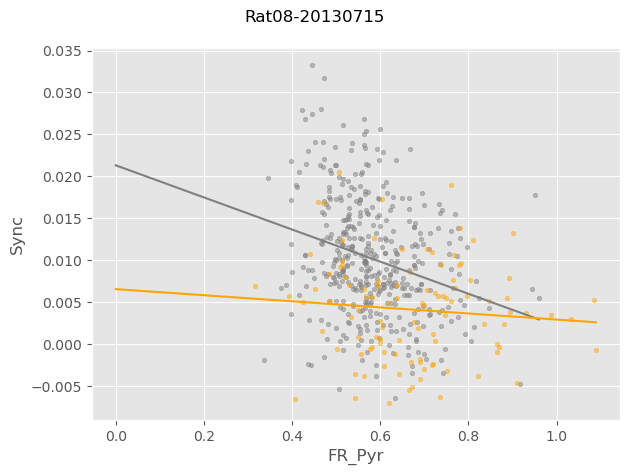

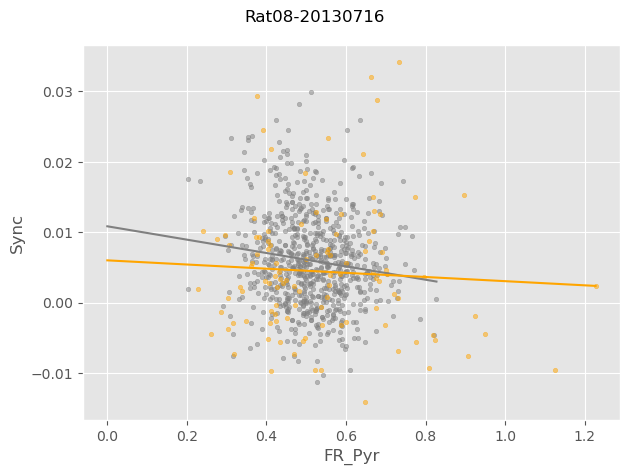

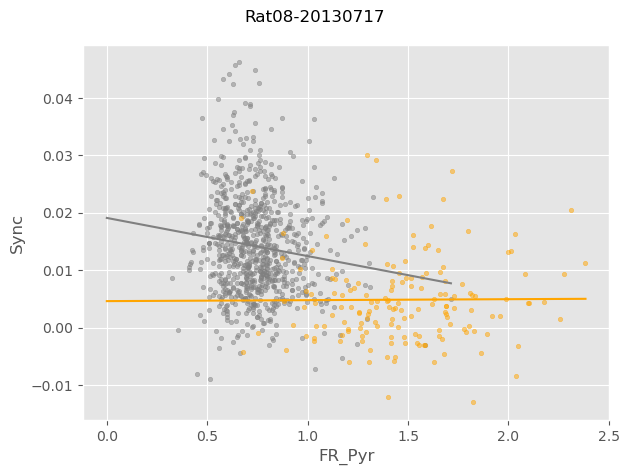

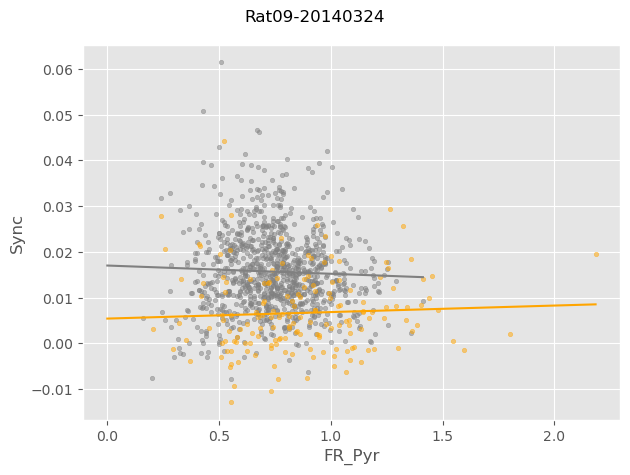

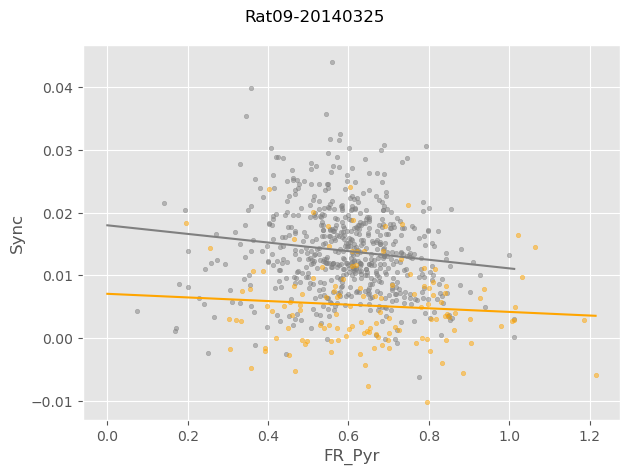

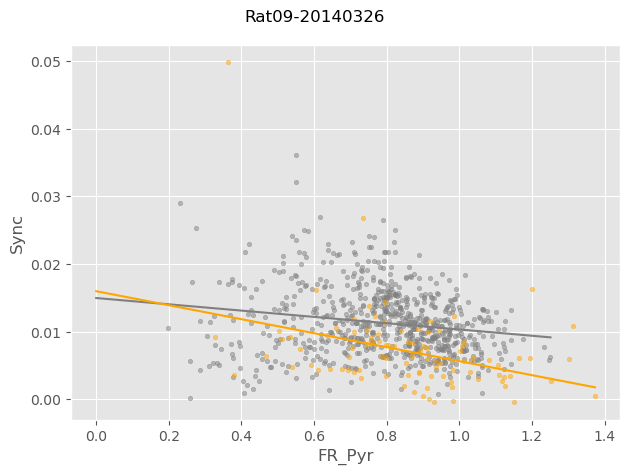

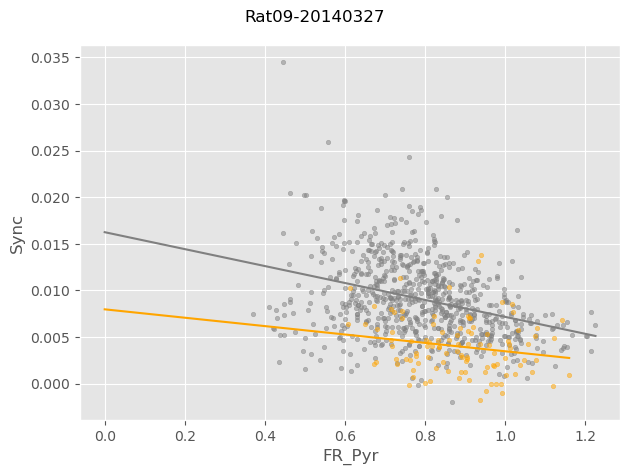

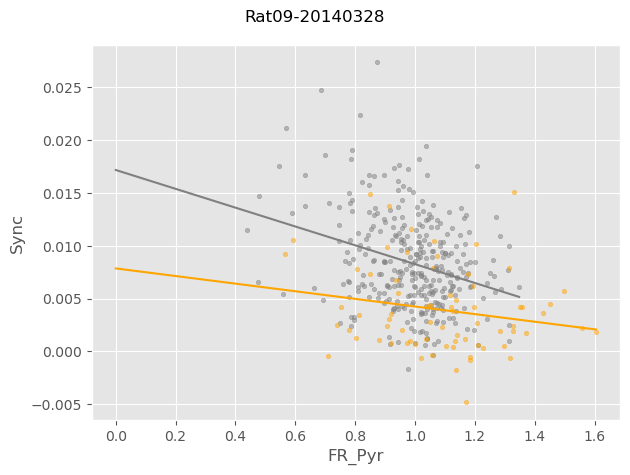

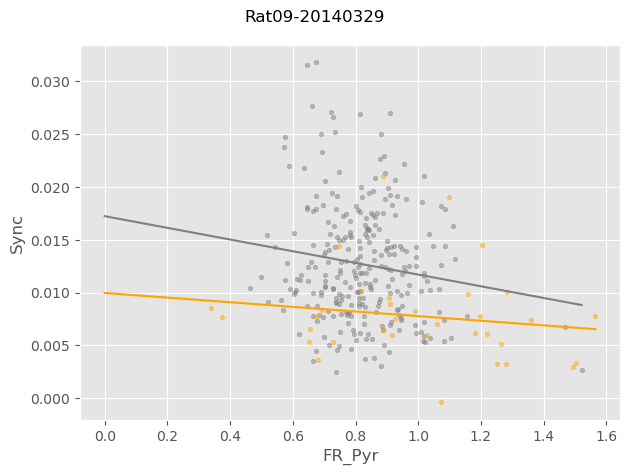

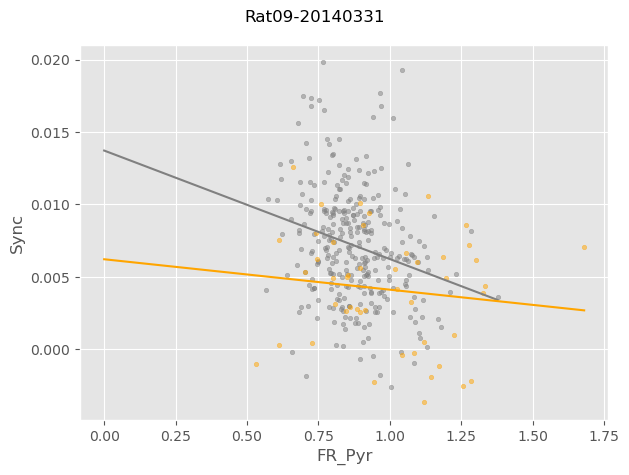

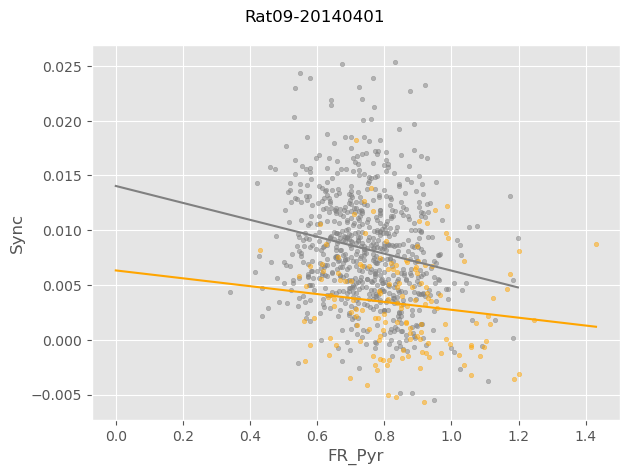

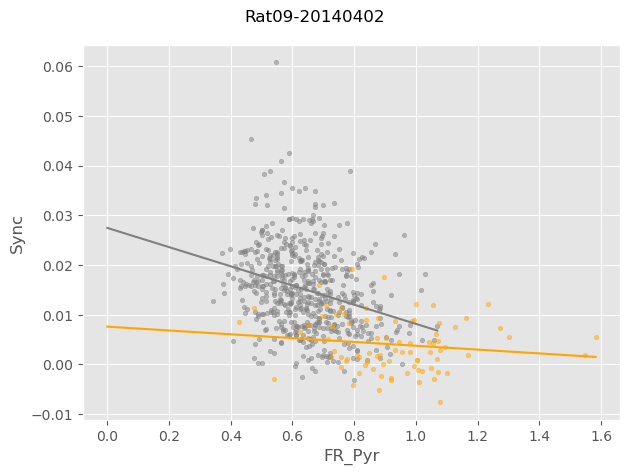

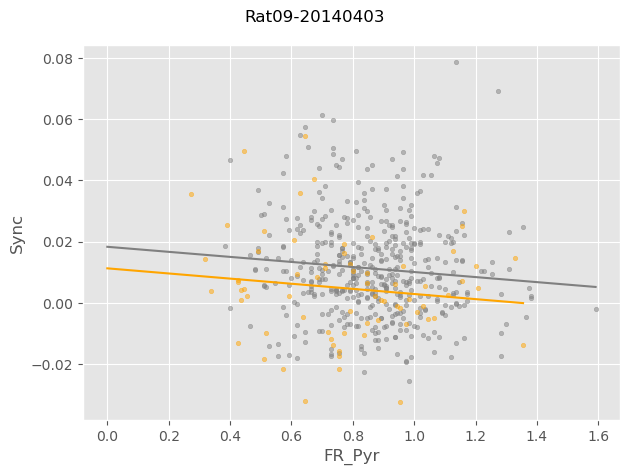

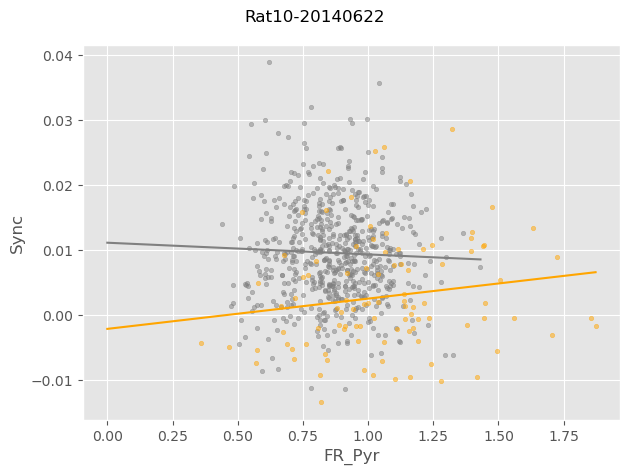

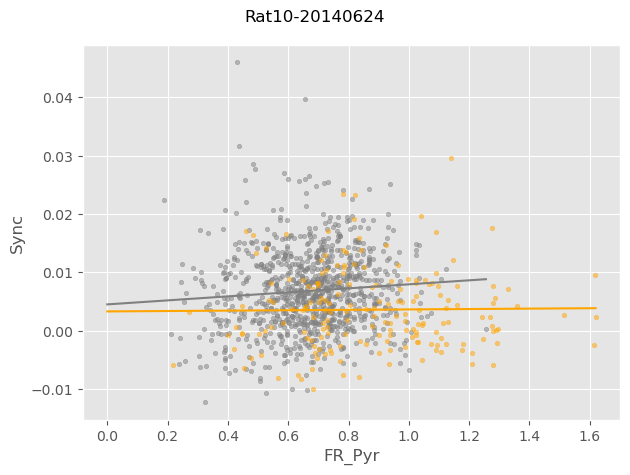

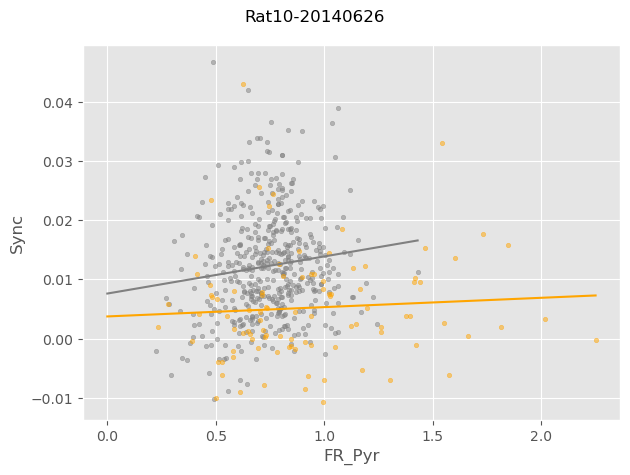

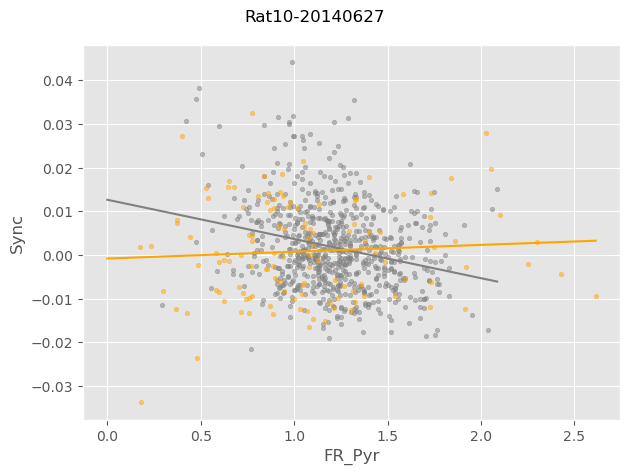

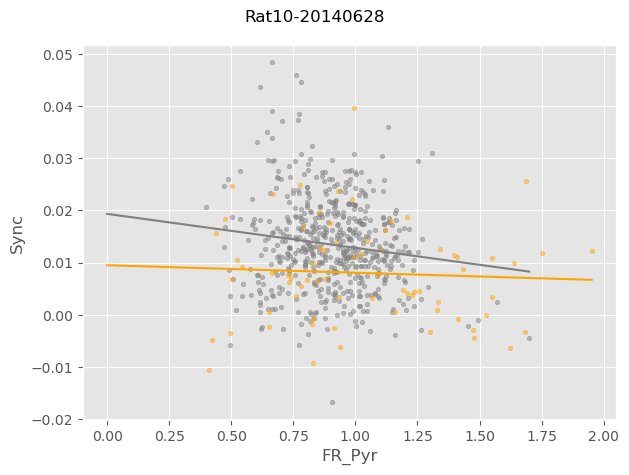

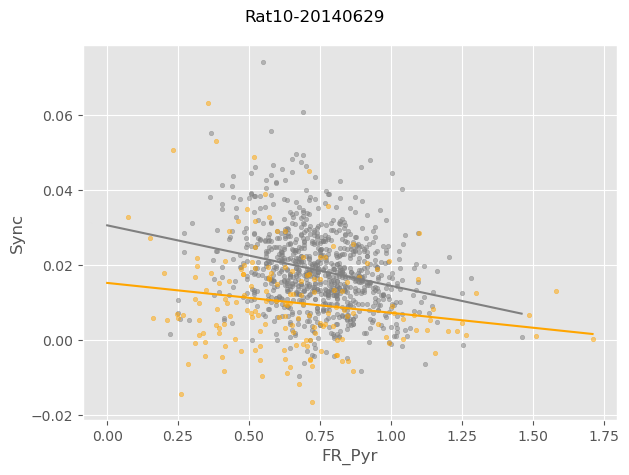

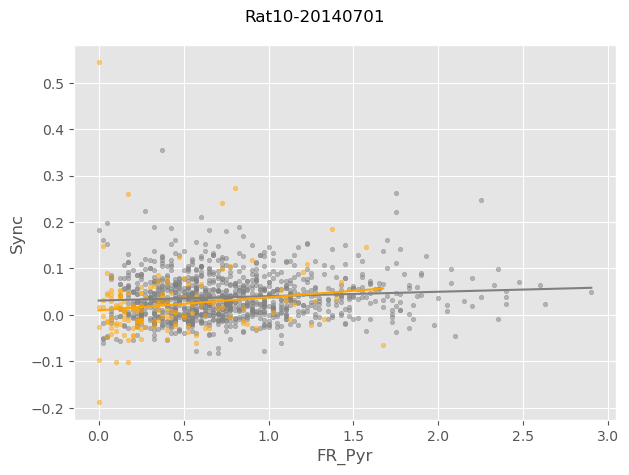

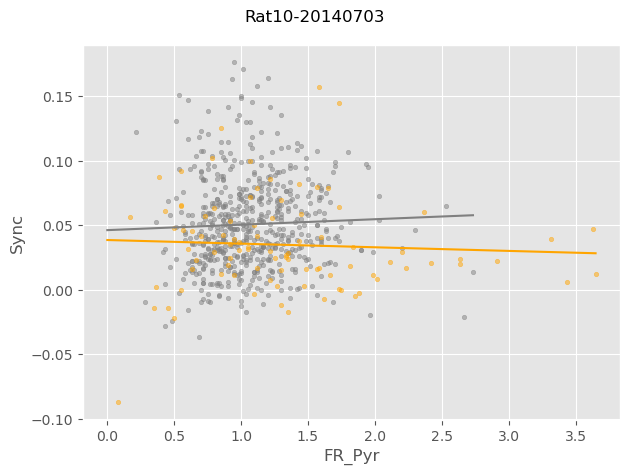

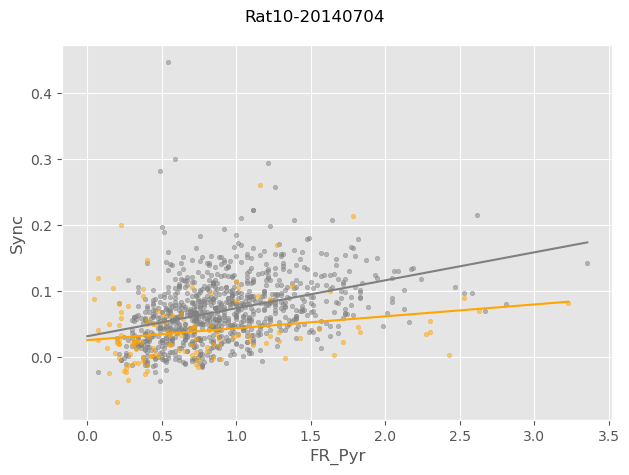

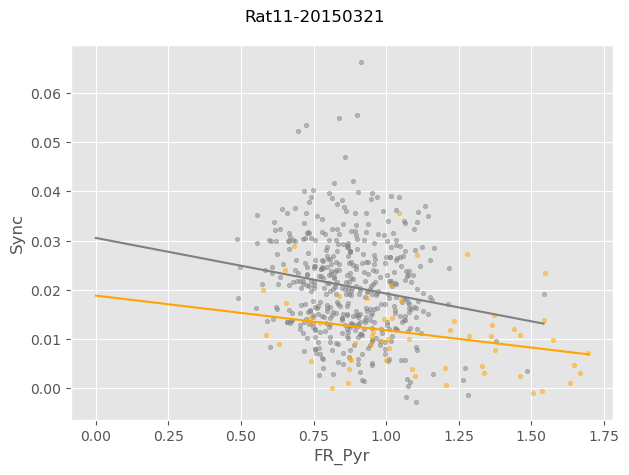

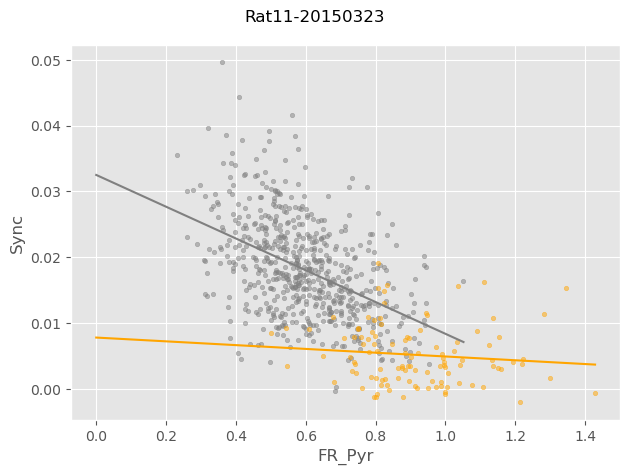

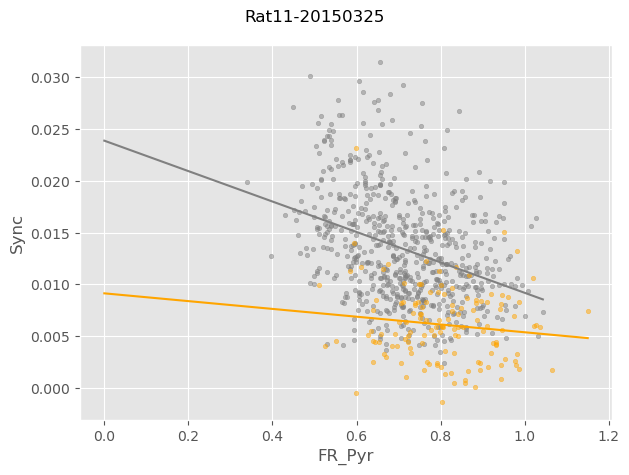

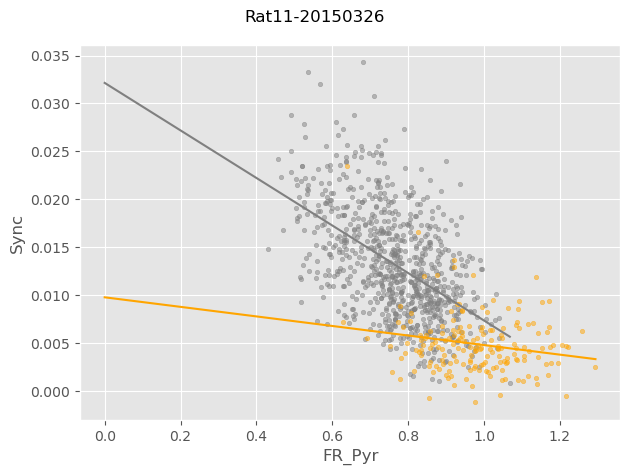

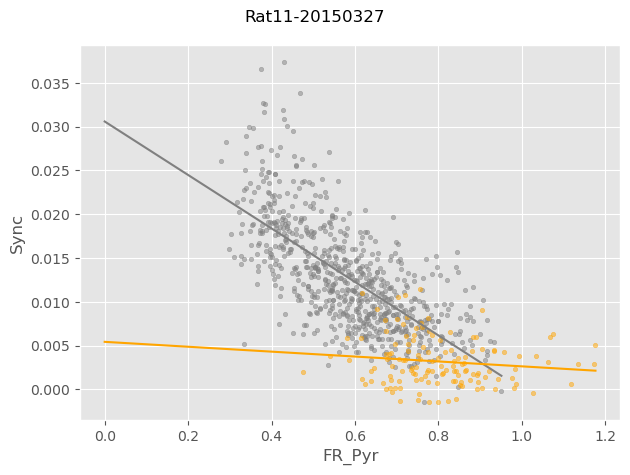

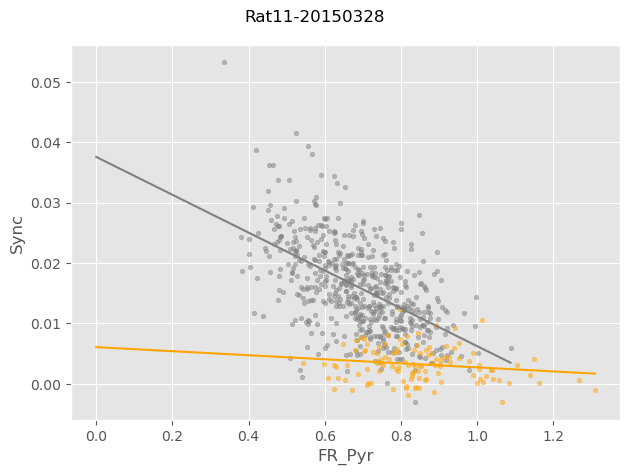

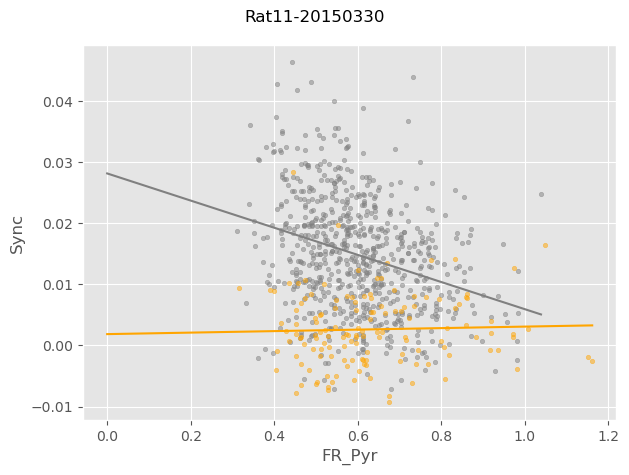

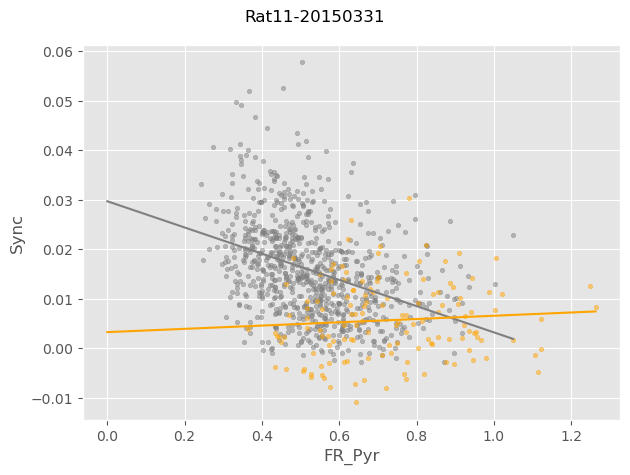

In [84]:
bk.load.current_session_linux()
# main(bk.load.base,'Rat08/Rat08-20130710')
batch,metadata = bk.load.batch(main,verbose=False)

In [90]:
df = pd.concat(batch)
df_melt = df.melt(id_vars='Rat',var_name='state',value_name='rvalue')
df_melt

,Rat,state,rvalue
0,8,NREM,-0.022273
1,8,NREM,-0.130343
2,8,NREM,-0.005865
3,8,NREM,-0.203159
4,8,NREM,-0.081795
...,...,...,...
65,11,REM,-0.194677
66,11,REM,-0.128095
67,11,REM,-0.165498
68,11,REM,0.033913


ShapiroResult(statistic=0.972946047782898, pvalue=0.5291067957878113)
ShapiroResult(statistic=0.9820206761360168, pvalue=0.8227704167366028)
Ttest_1sampResult(statistic=-5.1544154762629395, pvalue=1.083022629629019e-05)
Ttest_1sampResult(statistic=-4.01603313716071, pvalue=0.00030926892004887386)


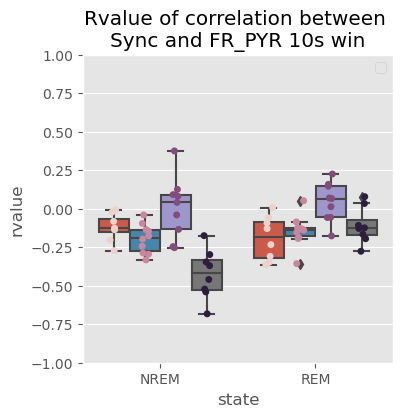

In [95]:

print(scipy.stats.shapiro(df['REM']))
print(scipy.stats.shapiro(df['NREM']))

plt.subplots(figsize=(4,4))
sns.boxplot(df_melt,x = 'state',y = 'rvalue',hue='Rat')
sns.stripplot(df_melt,x = 'state',y = 'rvalue',hue='Rat',dodge=True)
plt.ylim(-1,1)
plt.legend([])
plt.title('Rvalue of correlation between \nSync and FR_PYR 10s win')


print(scipy.stats.ttest_1samp(df['NREM'],0))
print(scipy.stats.ttest_1samp(df['REM'],0))

,,NREM,REM
Rat08-20130709,0,-0.022273,-0.309023
Rat08-20130710,0,-0.130343,-0.233057
Rat08-20130711,0,-0.005865,-0.364025
Rat08-20130712,0,-0.203159,-0.348522
Rat08-20130713,0,-0.081795,-0.128984
Rat08-20130715,0,-0.272283,-0.092051
Rat08-20130716,0,-0.136546,-0.059470
Rat08-20130717,0,-0.126343,0.007467
Rat09-20140324,0,-0.040486,0.051950
Rat09-20140325,0,-0.135471,-0.085656
